In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import os
import glob
import re

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import umap

In [2]:
files = glob.glob('../data/txt/*.txt')

In [3]:
vec_tfidf = TfidfVectorizer(
    input='filename',
    sublinear_tf=True,
    use_idf=True,
    decode_error='replace',
    norm='l2',
    analyzer='word'
)

vec_count = CountVectorizer(
    input='filename',
    decode_error='replace',
    analyzer='word',
    max_features=100
)

In [4]:
vec = vec_tfidf
X = vec.fit_transform(files)

In [5]:
X

<42x68494 sparse matrix of type '<class 'numpy.float64'>'
	with 165554 stored elements in Compressed Sparse Row format>

In [6]:
df = pd.DataFrame(X.toarray())
df.columns = vec.get_feature_names_out()
df.head()

,10,12,13,130,14,15,16,1capite,20,23,...,ὑπὸ,ὕδατι,ὕδωρ,ὠδῖνα,ὠδῖνος,ὡς,ὡστε,ῥιγαλέον,ῥυσμῷ,ῥἀυτὴ
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
# opening the functionwords file

stops = []

with open('../data/functionwords.txt','r') as file:
    for line in file:
        words = line.lower().split()
        for word in words:
            stops.append(word)
            
stops = [s for s in stops if s != '/']
print(stops[:10])

['atqui', 'atqvi', 'autem', 'avtem', 'certe', 'ceu', 'cev', 'confestim', 'cum', 'cvm']


In [38]:
len(stops)

94

In [48]:
stops_df = df[df.columns.intersection(stops)]

In [49]:
stops_df

,atqui,autem,avtem,certe,ceu,confestim,cum,cvm,dehinc,deinceps,...,uidelicet,ut,utique,velut,veluti,velvt,vero,videlicet,vt,vtiqve
0,0.000000,0.024964,0.000000,0.013457,0.007271,0.012730,0.018453,0.000000,0.008993,0.021696,...,0.000000,0.020451,0.023655,0.025445,0.000000,0.000000,0.021718,0.006778,0.000000,0.000000
1,0.035352,0.018851,0.000000,0.025052,0.023724,0.005271,0.017728,0.000000,0.018645,0.017879,...,0.000000,0.017062,0.021152,0.025984,0.020195,0.000000,0.023378,0.011339,0.000000,0.000000
2,0.000000,0.014313,0.000000,0.003117,0.011221,0.014601,0.012868,0.000000,0.004971,0.014809,...,0.000000,0.012305,0.012924,0.012021,0.004735,0.000000,0.017733,0.014363,0.000000,0.000000
3,0.020995,0.021092,0.000000,0.008099,0.006168,0.000000,0.015158,0.000000,0.000000,0.012297,...,0.000000,0.020902,0.000000,0.016741,0.024690,0.000000,0.027833,0.000000,0.000000,0.000000
4,0.000000,0.047187,0.000000,0.012668,0.000000,0.000000,0.021636,0.000000,0.000000,0.000000,...,0.000000,0.027070,0.044352,0.000000,0.000000,0.000000,0.038028,0.000000,0.000000,0.000000
5,0.000000,0.031055,0.000000,0.014758,0.000000,0.018572,0.017943,0.000000,0.000000,0.000000,...,0.000000,0.021018,0.032481,0.000000,0.000000,0.000000,0.022535,0.000000,0.000000,0.000000
6,0.034186,0.027801,0.000000,0.028531,0.047110,0.000000,0.023459,0.000000,0.015444,0.015100,...,0.000000,0.026947,0.026718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.033497,0.000000,0.008509,0.000000,0.022474,0.018293,0.000000,0.000000,0.000000,...,0.000000,0.021372,0.014812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.025575,0.000000,0.005365,0.000000,0.005075,0.018128,0.000000,0.000000,0.004940,...,0.000000,0.018499,0.019682,0.009626,0.000000,0.000000,0.000000,0.000000,0.015278,0.000000
9,0.000000,0.028858,0.000000,0.000000,0.000000,0.000000,0.022420,0.000000,0.000000,0.000000,...,0.000000,0.022178,0.023499,0.000000,0.000000,0.000000,0.027829,0.007053,0.000000,0.000000


In [9]:
names = [f.split('/')[-1].split('.')[0] for f in files]

In [10]:
names

['BurCom',
 'AristPha',
 'BurInt',
 'AnonMetaph',
 'BurEthN',
 'BarMor',
 'AristMet',
 'BarMirab',
 'WilMet',
 'JamPhys',
 'WilInPar',
 'BarMun',
 'WilTet',
 'BarSig',
 'AristPhaP',
 'BarPri',
 'WilInTim',
 'JamMetaph',
 'BurNemP',
 'WilCael',
 'BurGen',
 'BurP',
 'WilHis',
 'AnonPhys',
 'Myst5',
 'WilElem',
 'WilSimp',
 'Myst4',
 'JamAnim',
 'Myst1',
 'Myst3',
 'Myst2',
 'WilGenA',
 'BarHom',
 'BurX',
 'BarPue',
 'BurMat',
 'AristMen',
 'BurMatP',
 'WilAlex',
 'BurEthV',
 'BurFid']

In [11]:
translators = [re.match('[A-Z][a-z]+', fn)[0] for fn in names]
translators

['Bur',
 'Arist',
 'Bur',
 'Anon',
 'Bur',
 'Bar',
 'Arist',
 'Bar',
 'Wil',
 'Jam',
 'Wil',
 'Bar',
 'Wil',
 'Bar',
 'Arist',
 'Bar',
 'Wil',
 'Jam',
 'Bur',
 'Wil',
 'Bur',
 'Bur',
 'Wil',
 'Anon',
 'Myst',
 'Wil',
 'Wil',
 'Myst',
 'Jam',
 'Myst',
 'Myst',
 'Myst',
 'Wil',
 'Bar',
 'Bur',
 'Bar',
 'Bur',
 'Arist',
 'Bur',
 'Wil',
 'Bur',
 'Bur']

In [12]:
stops_df.insert(0,'name',names)
stops_df

,name,atqui,autem,avtem,certe,ceu,confestim,cum,cvm,dehinc,...,uidelicet,ut,utique,velut,veluti,velvt,vero,videlicet,vt,vtiqve
0,BurCom,0.000000,0.024964,0.000000,0.013457,0.007271,0.012730,0.018453,0.000000,0.008993,...,0.000000,0.020451,0.023655,0.025445,0.000000,0.000000,0.021718,0.006778,0.000000,0.000000
1,AristPha,0.035352,0.018851,0.000000,0.025052,0.023724,0.005271,0.017728,0.000000,0.018645,...,0.000000,0.017062,0.021152,0.025984,0.020195,0.000000,0.023378,0.011339,0.000000,0.000000
2,BurInt,0.000000,0.014313,0.000000,0.003117,0.011221,0.014601,0.012868,0.000000,0.004971,...,0.000000,0.012305,0.012924,0.012021,0.004735,0.000000,0.017733,0.014363,0.000000,0.000000
3,AnonMetaph,0.020995,0.021092,0.000000,0.008099,0.006168,0.000000,0.015158,0.000000,0.000000,...,0.000000,0.020902,0.000000,0.016741,0.024690,0.000000,0.027833,0.000000,0.000000,0.000000
4,BurEthN,0.000000,0.047187,0.000000,0.012668,0.000000,0.000000,0.021636,0.000000,0.000000,...,0.000000,0.027070,0.044352,0.000000,0.000000,0.000000,0.038028,0.000000,0.000000,0.000000
5,BarMor,0.000000,0.031055,0.000000,0.014758,0.000000,0.018572,0.017943,0.000000,0.000000,...,0.000000,0.021018,0.032481,0.000000,0.000000,0.000000,0.022535,0.000000,0.000000,0.000000
6,AristMet,0.034186,0.027801,0.000000,0.028531,0.047110,0.000000,0.023459,0.000000,0.015444,...,0.000000,0.026947,0.026718,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,BarMirab,0.000000,0.033497,0.000000,0.008509,0.000000,0.022474,0.018293,0.000000,0.000000,...,0.000000,0.021372,0.014812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,WilMet,0.000000,0.025575,0.000000,0.005365,0.000000,0.005075,0.018128,0.000000,0.000000,...,0.000000,0.018499,0.019682,0.009626,0.000000,0.000000,0.000000,0.000000,0.015278,0.000000
9,JamPhys,0.000000,0.028858,0.000000,0.000000,0.000000,0.000000,0.022420,0.000000,0.000000,...,0.000000,0.022178,0.023499,0.000000,0.000000,0.000000,0.027829,0.007053,0.000000,0.000000


In [13]:
# stops_df.to_csv('../data/stops_df.csv')

In [14]:
# Dimension reduction and clustering with UMAP

umap_results = pd.DataFrame(stops_df['name'])
umapper = umap.UMAP(
    n_neighbors=15,
    n_components=2,
    metric='cosine',
    # UMAP figures change with every run if not seeded
    random_state=42
)

u = umapper.fit_transform(stops_df.drop(['name'], axis=1))
umap_results['X'], umap_results['Y'] =  u[:,0], u[:,1]
umap_results['translator'] = translators # used for colouring

In [15]:
umap_results

,name,X,Y,translator
0,BurCom,-3.065547,5.818556,Bur
1,AristPha,-0.436601,6.029958,Arist
2,BurInt,-3.217879,6.428337,Bur
3,AnonMetaph,-0.535712,5.498480,Anon
4,BurEthN,-1.951578,3.451141,Bur
5,BarMor,-1.612283,4.369727,Bar
6,AristMet,-0.702820,6.674922,Arist
7,BarMirab,-2.710320,4.248311,Bar
8,WilMet,-2.078884,7.258792,Wil
9,JamPhys,-1.094974,4.704408,Jam


In [466]:
!pip install rpy2

In [16]:
import rpy2
%load_ext rpy2.ipython

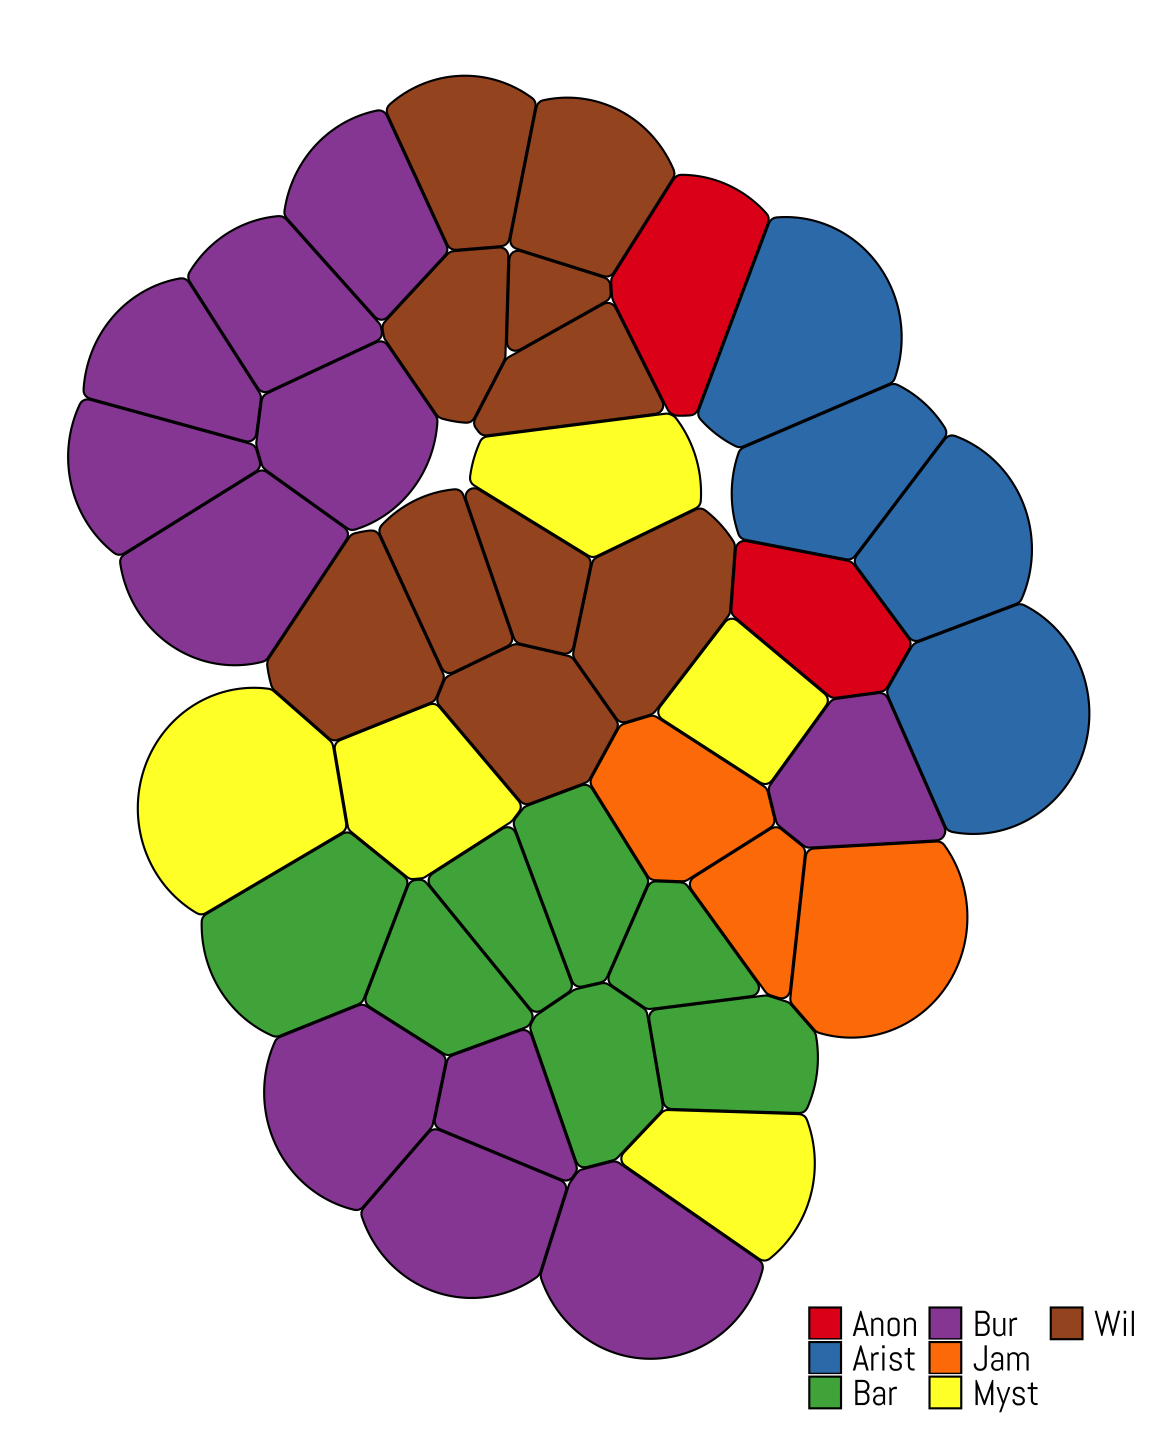

In [21]:
%%R -i umap_results -h 10 -w 8 -u in -r 144

library(ggforce)
library(ggsci)
library(showtext)
font_add_google("Abel", "fnt")
showtext_auto()

pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628")

ggplot(data=umap_results,aes(x=X, y=Y)) +
geom_voronoi_tile(aes(fill = translator, group = -1L, ), max.radius = 0.5,
                    colour = 'black', expand = unit(-0.1, 'mm'), 
                    radius = unit(1.5, 'mm')) +
scale_fill_manual(values=pal) +


theme_minimal() +
theme(
    panel.border = element_blank()
) +
guides(fill = guide_legend(ncol=3, override.aes = aes(size=0.5, color='black'))) +
theme(legend.title=element_blank(), legend.key=element_rect(color='white'), legend.position= c(0.85, 0.05), legend.text=element_text(size=18)) +
theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank()) +
theme(axis.title.y=element_blank(),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank()) +
theme(text = element_text(size=10, family="fnt"), panel.grid.minor=element_blank(), panel.grid.major=element_blank())

In [22]:
dfs = []
X,y = stops_df.drop('name',axis=1), stops_df['name']
# make 100 KNN graphs using a random subset of 25 features
for _ in range(100):
    this_X = X.sample(25,axis=1)
    #cl = KNeighborsClassifier(n_neighbors=3, metric='mahalanobis',metric_params={'V': np.cov(this_X.T)})
    cl = KNeighborsClassifier(n_neighbors=3, metric='cosine')
    cl.fit(this_X,y)
    dists,indices = cl.kneighbors(n_neighbors=3)
    dicts = []
    for i, node_ary in enumerate(indices):
        for j, node in enumerate(node_ary):
            dicts.append({
                'from': y[i],
                'to': y[node],
                # neighbors are sorted low distance to high
                # so this gives us the 'inverse rank' ie lowest
                # distance of n neighbors scores n, next is n-1 etc
                # this is consistent with the stylo BCT algorithm
                'weight': (len(node_ary)-j)
            })
    dfs.append(pd.DataFrame(dicts))

# now merge all the graphs by adding the edge weights
consensus = pd.concat(dfs).groupby(['from','to'],as_index=False).agg(sum)

In [23]:
consensus

,from,to,weight
0,AnonMetaph,AnonPhys,75
1,AnonMetaph,AristMen,84
2,AnonMetaph,AristMet,4
3,AnonMetaph,AristPha,43
4,AnonMetaph,BarMor,1
...,...,...,...
986,WilTet,WilHis,12
987,WilTet,WilInPar,28
988,WilTet,WilInTim,133
989,WilTet,WilMet,221


In [24]:
# trim to taste, otherwise it's very noisy
consensus = consensus[consensus['weight'] >= 25]

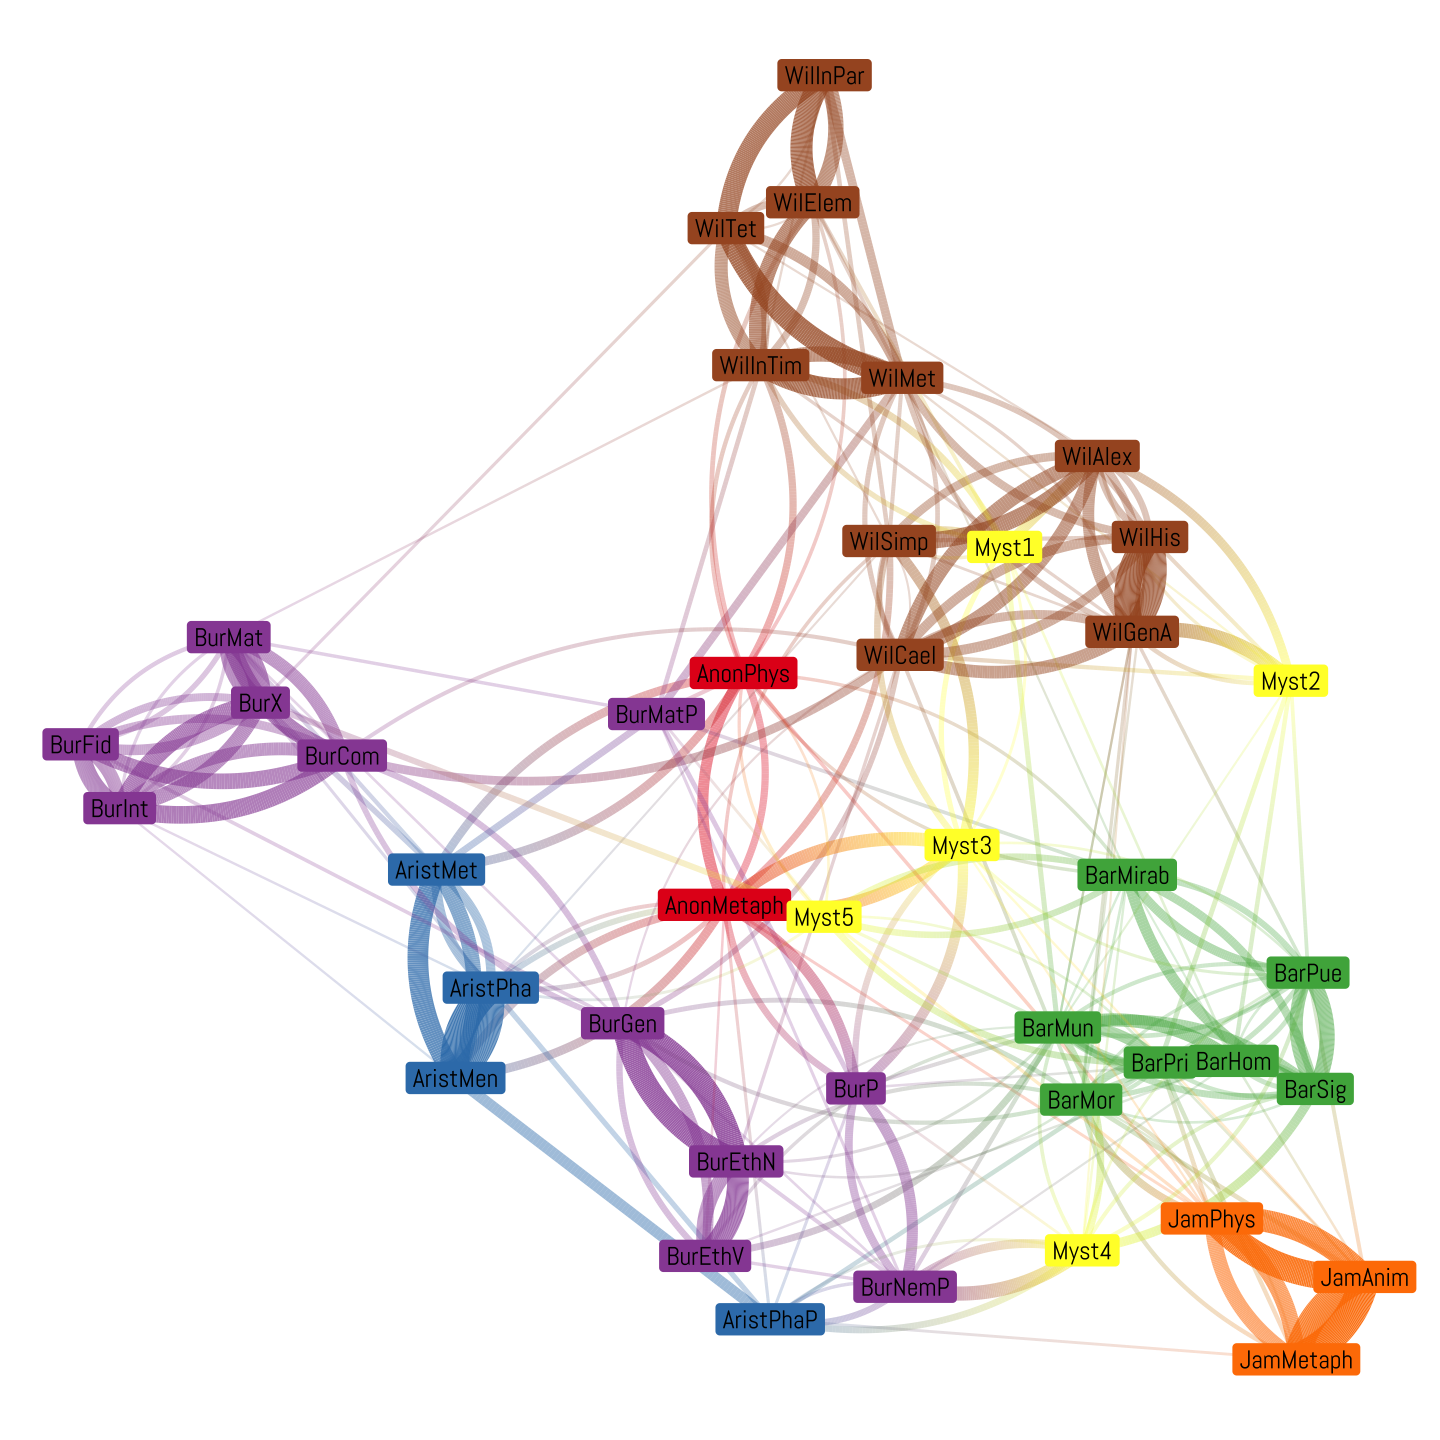

In [28]:
%%R -i consensus  -h 10 -w 10 -u in -r 144

library(tidygraph)
library(ggraph)
library(stringr)

pal <- c("#E41A1C", "#377EB8", "#4DAF4A", "#984EA3", "#FF7F00", "#FFFF33", "#A65628")

set.seed(42)
gr1 <- as_tbl_graph(consensus)
# Plot
gr1 %>%
    activate(nodes) %>%
    mutate(transl = str_match(name, '[A-Z][a-z]+')) %>%
    ggraph(layout = 'fr') + 
    geom_edge_fan2(aes(width=weight,color=node.transl,alpha=weight),strength=2,show.legend=FALSE) + 
    geom_node_label(
        label.size=NA,
        size = 4.5,
        family="fnt",
        aes(fill=transl, label=name),
    ) +
    scale_fill_manual(values=pal) +
    scale_color_manual(values=pal) +
    scale_edge_color_manual(values=pal) +
    scale_edge_width(range=c(0.5,7)) +
    scale_edge_alpha(range=c(0.2,1)) +
    theme_minimal() +
    theme(
        plot.title = element_text(margin = margin(b = 50)),
        panel.border = element_blank()
    ) +
    theme(legend.position='none') +
    theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank()) +
    theme(axis.title.y=element_blank(),
            axis.text.y=element_blank(),
            axis.ticks.y=element_blank()) +
    theme(text = element_text(family="fnt"),panel.grid.minor=element_blank(), panel.grid.major=element_blank())

### Using Networkx for python

In [581]:
import networkx as nx
G = nx.from_pandas_edgelist(consensus, source='from', target='to', edge_attr=True)

In [582]:
pos = nx.drawing.layout.spring_layout(G)
nx.set_node_attributes(G, pos, 'pos')

edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

In [583]:
G.nodes._nodes

{'AnonMetaph': {'pos': array([-0.02428191, -0.01962433])},
 'AnonPhys': {'pos': array([-0.20181499, -0.10891459])},
 'AristMen': {'pos': array([0.07756689, 0.45240299])},
 'AristPha': {'pos': array([0.06017898, 0.55129547])},
 'BurP': {'pos': array([0.2488265 , 0.02040554])},
 'JamAnim': {'pos': array([ 0.2675101 , -0.61349787])},
 'JamPhys': {'pos': array([ 0.19094953, -0.47115783])},
 'Myst3': {'pos': array([-0.07404547, -0.34942702])},
 'WilSimp': {'pos': array([-0.55518944, -0.3566432 ])},
 'AristMet': {'pos': array([-0.18283204,  0.45733682])},
 'BarMirab': {'pos': array([ 0.39324329, -0.29149677])},
 'WilElem': {'pos': array([-0.69006967, -0.53205332])},
 'WilInTim': {'pos': array([-0.54132153, -0.16968299])},
 'BurInt': {'pos': array([-0.20962313,  0.99117681])},
 'BurMat': {'pos': array([-0.4502469 ,  0.63315609])},
 'BurX': {'pos': array([-0.21256071,  0.75364781])},
 'Myst5': {'pos': array([0.1409977 , 0.13691301])},
 'AristPhaP': {'pos': array([0.43737186, 0.20457733])},
 'B

## Predicting the Translator using Random Forest Classification

### 1. Text preprocessing

In [29]:
folder_path = '../data/txt'

In [30]:
import os
import string

def preprocess_text(text):
    # lowercase
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans("", "", string.punctuation))
    
    return text

def slice_text_into_samples(text, sample_size=1000):
    text = text.split()
    num_samples = len(text) // sample_size
    samples = [text[i * sample_size : (i + 1) * sample_size] for i in range(num_samples)]
    
    return samples

def preprocess_and_slice_text_files(folder_path, sample_size=1000):
    processed_texts = {}
    names = []
    translators = []
    for filename in os.listdir(folder_path):
        if filename.endswith(".txt") and not filename.startswith("Myst"): # i'm skipping the Mysery files
            with open(os.path.join(folder_path, filename), "r", encoding='latin-1') as file:
                text = file.read()
                processed_text = preprocess_text(text)
                samples = slice_text_into_samples(processed_text, sample_size)
                num_samples = len(samples)
                for i, sample in enumerate(samples):
                    variable_name = filename[:-4] + "_" + str(i)
                    processed_texts[variable_name] = sample
            print(f"'{filename}' was processed and split into {num_samples} samples")
    return processed_texts

In [31]:
preprocess = preprocess_and_slice_text_files(folder_path)

'BurCom.txt' was processed and split into 24 samples
'AristPha.txt' was processed and split into 20 samples
'BurInt.txt' was processed and split into 64 samples
'AnonMetaph.txt' was processed and split into 61 samples
'BurEthN.txt' was processed and split into 4 samples
'BarMor.txt' was processed and split into 20 samples
'AristMet.txt' was processed and split into 6 samples
'BarMirab.txt' was processed and split into 7 samples
'WilMet.txt' was processed and split into 30 samples
'JamPhys.txt' was processed and split into 53 samples
'WilInPar.txt' was processed and split into 161 samples
'BarMun.txt' was processed and split into 5 samples
'WilTet.txt' was processed and split into 33 samples
'BarSig.txt' was processed and split into 3 samples
'AristPhaP.txt' was processed and split into 0 samples
'BarPri.txt' was processed and split into 2 samples
'WilInTim.txt' was processed and split into 4 samples
'JamMetaph.txt' was processed and split into 15 samples
'BurNemP.txt' was processed and

In [32]:
d = {k: ' '.join(v) for k, v in preprocess.items()}

In [36]:
print(f'Total number of samples:', len(d))

Total number of samples: 1157


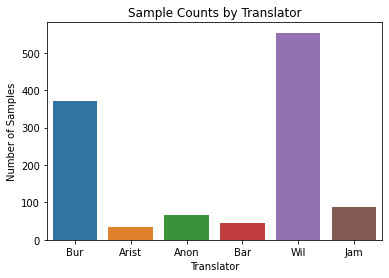

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the counts for each translator
translator_counts = {}
for key in d.keys():
    translator = re.match('[A-Z][a-z]+', key)[0]
    if translator in translator_counts:
        translator_counts[translator] += 1
    else:
        translator_counts[translator] = 1
        
# Plot the counts
sns.barplot(x=list(translator_counts.keys()), y=list(translator_counts.values()))
plt.xlabel("Translator")
plt.ylabel("Number of Samples")
plt.title("Sample Counts by Translator")
plt.show()

### 2. Vectorizing the text samples (tf-idf)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def build_tfidf_vectorizer(processed_texts, max_features=50):
    sample_texts = list(processed_texts.values())
    vectorizer = TfidfVectorizer(max_features=max_features, use_idf=False, analyzer='word')
    tfidf_matrix = vectorizer.fit_transform(sample_texts)
    tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
    translators = [re.match('[A-Z][a-z]+', fn)[0] for fn in d.keys()]
    tfidf_df.insert(0, "Translator", translators)
    #tfidf_df.insert(0, "Sample Name", d.keys()) # uncomment this line if you want the text files as a column
    return tfidf_df

In [41]:
# define the number of features to be extracted
max_features=50

tfidf_df = build_tfidf_vectorizer(d, max_features=max_features)
tfidf_df_nolabels = tfidf_df.iloc[:, 1:] # df without the first column (containing labels)
tfidf_df

,Translator,ab,ad,ait,aut,autem,circa,cum,de,enim,...,secundum,sed,si,sic,sicut,sunt,unum,ut,utique,vero
0,Bur,0.019101,0.009551,0.000000,0.038203,0.210115,0.000000,0.057304,0.028652,0.124159,...,0.076406,0.085956,0.105058,0.000000,0.000000,0.057304,0.009551,0.057304,0.085956,0.085956
1,Bur,0.029040,0.048400,0.000000,0.087120,0.251681,0.009680,0.067760,0.038720,0.154881,...,0.019360,0.096800,0.106480,0.000000,0.000000,0.029040,0.019360,0.096800,0.135521,0.029040
2,Bur,0.068430,0.068430,0.000000,0.097758,0.244394,0.000000,0.000000,0.019552,0.117309,...,0.146637,0.146637,0.156412,0.019552,0.000000,0.039103,0.019552,0.107534,0.058655,0.097758
3,Bur,0.009216,0.193542,0.000000,0.119812,0.350219,0.009216,0.018433,0.046081,0.119812,...,0.092163,0.110596,0.119812,0.000000,0.000000,0.036865,0.018433,0.138244,0.082947,0.018433
4,Bur,0.008652,0.121127,0.000000,0.397989,0.250906,0.000000,0.043260,0.043260,0.051912,...,0.095171,0.060564,0.051912,0.000000,0.000000,0.017304,0.008652,0.242254,0.129779,0.043260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,Bur,0.027711,0.120082,0.055423,0.009237,0.203216,0.000000,0.064660,0.018474,0.110845,...,0.138557,0.101608,0.036948,0.000000,0.000000,0.055423,0.000000,0.221691,0.009237,0.009237
1153,Bur,0.041737,0.083474,0.020868,0.000000,0.177382,0.010434,0.020868,0.010434,0.198250,...,0.104342,0.125211,0.093908,0.000000,0.000000,0.125211,0.020868,0.093908,0.020868,0.031303
1154,Bur,0.032371,0.064741,0.021580,0.000000,0.248174,0.021580,0.032371,0.075531,0.086321,...,0.032371,0.129482,0.043161,0.000000,0.010790,0.043161,0.010790,0.161853,0.021580,0.010790
1155,Bur,0.021584,0.043168,0.000000,0.000000,0.183465,0.000000,0.043168,0.043168,0.151089,...,0.032376,0.097129,0.021584,0.000000,0.021584,0.161881,0.000000,0.075544,0.010792,0.010792


In [46]:
[x for x in tfidf_df.columns if not x in stops]

['Translator',
 'ab',
 'ad',
 'ait',
 'aut',
 'circa',
 'de',
 'erit',
 'esse',
 'est',
 'et',
 'ex',
 'fit',
 'habet',
 'hec',
 'hiis',
 'hoc',
 'in',
 'ipsum',
 'ita',
 'magis',
 'naturam',
 'neque',
 'non',
 'omnia',
 'per',
 'propter',
 'quae',
 'quam',
 'que',
 'qui',
 'quid',
 'quidem',
 'se',
 'secundum',
 'sed',
 'si',
 'sic',
 'sunt',
 'unum']

In [47]:
stops

['atqui',
 'atqvi',
 'autem',
 'avtem',
 'certe',
 'ceu',
 'cev',
 'confestim',
 'cum',
 'cvm',
 'dehinc',
 'deinceps',
 'demum',
 'denique',
 'enim',
 'ergo',
 'etiam',
 'eciam',
 'exinde',
 'forsan',
 'forsitan',
 'fortassis',
 'ideo',
 'igitur',
 'igitvr',
 'itaque',
 'itaqve',
 'iterum',
 'itervm',
 'mox',
 'multotiens',
 'multoties',
 'mvltotiens',
 'mvltoties',
 'nam',
 'namque',
 'namqve',
 'nanque',
 'nanqve',
 'nempe',
 'nimirum',
 'nimirvm',
 'puta',
 'pvta',
 'quando',
 'qvando',
 'quemadmodum',
 'qvemadmodvm',
 'quia',
 'qvia',
 'quippe',
 'qvippe',
 'quod',
 'qvod',
 'quoniam',
 'qvoniam',
 'quoque',
 'qvoqve',
 'precipue',
 'praecipue',
 'precipve',
 'praecipve',
 'rursum',
 'rvrsvm',
 'rursus',
 'rvrsvs',
 'sane',
 'scilicet',
 'sepe',
 'saepe',
 'sicut',
 'sicvt',
 'siquidem',
 'siqvidem',
 'tamquam',
 'tanquam',
 'tamqvam',
 'tanquam',
 'ut',
 'vt',
 'utique',
 'vtiqve',
 'velut',
 'uelut',
 'velvt',
 'veluti',
 'ueluti',
 'velvti',
 'vero',
 'uero',
 'vero',
 'videlic

In [685]:
#sample_names = tfidf_df['Sample Name'].tolist() # if there is a column 'Sample name', this will give you a list of all sample names
translators = tfidf_df['Translator'].tolist()

### 3. Plot feature importances for Random Forest Classification

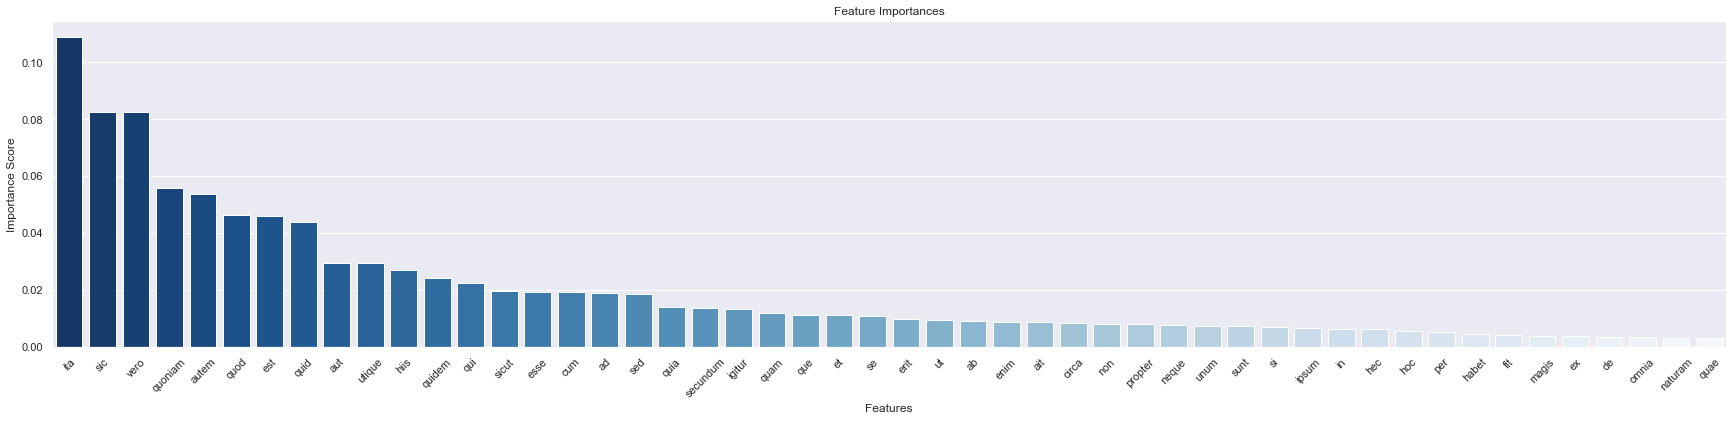

In [686]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train the classifier
clf = RandomForestClassifier(n_estimators=100)
X = tfidf_df_nolabels.values
y = translators
clf.fit(X, y)

# Plot the feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
features = tfidf_df_nolabels.columns[:]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(30,6))
sns.barplot(x=features[indices], y=importances[indices], palette='Blues_r')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()

### 4. Plot feature importances for Random Forest Classification

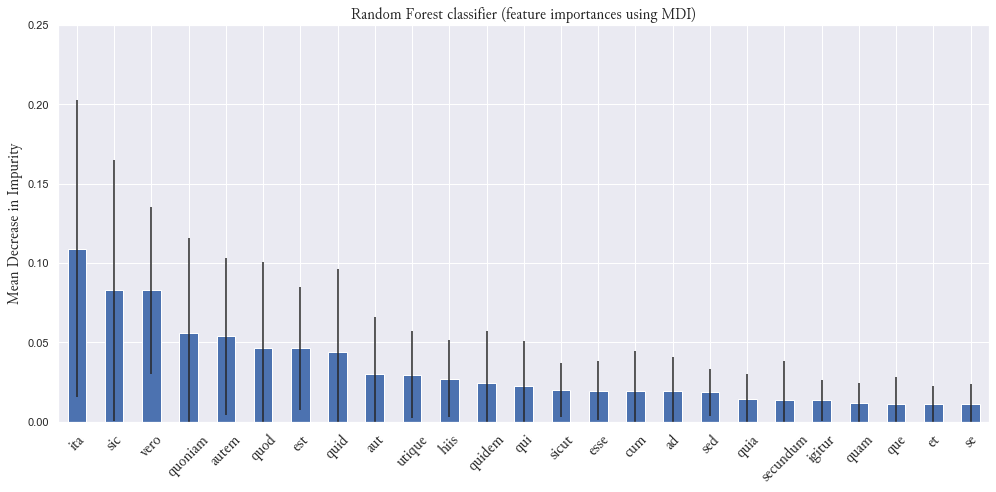

In [687]:
topn = 25 # default: 20
idxs = np.argsort(importances)[::-1][:topn]

importances = importances[idxs]
std = std[idxs]
names = tfidf_df_nolabels.columns[:]
names = names[idxs]
forest_importances = pd.Series(importances, index=names)

forest_importances = pd.Series(importances, index=names)
sns.set_theme()

# set junicode font for labels (able to render medieval glyphs)
font = {'family': 'Junicode',
        'size': 15,
        }

fig, ax = plt.subplots(figsize=(14, 7))
forest_importances.plot.bar(yerr=std, ax=ax, rot=0)
ax.set_title("Random Forest classifier (feature importances using MDI)", fontdict=font)
ax.set_ylabel("Mean Decrease in Impurity", fontdict=font)
ax.set_xticklabels(names, fontdict=font, rotation=45)
#ax.set_yticklabels(importances, fontdict=font)
ax.set_ylim((0, .25))
fig.tight_layout()
plt.savefig('features_importance_mdi.svg', transparent=False, dpi=300)

### 5. Visualizing decision tree for Random Forest Classification

In [688]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from dtreeviz.trees import dtreeviz

# put data in one variable
data = np.vstack(tfidf_df_nolabels.values), np.array(translators)

X = data[0] # features
y = data[1] # labels

X_inst = data[0][np.random.randint(0, len(data[0])),:]

lb = LabelEncoder()
y2 = lb.fit_transform(y)
y_series = pd.Series(y2)
class_names = list(lb.inverse_transform(np.unique(y2)))
print(class_names)

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            max_features=0.9,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            random_state=0)

rf.fit(X, y)

tree_n=11

viz = dtreeviz(rf.estimators_[tree_n], X, y_series, # change the estimator number to get a different decision tree
               target_name="Translator",
               class_names=class_names,
               feature_names=features,
               title=f"{tree_n+1}th decision tree for scribal features",
               fontname='Junicode',
               fancy=True, 
               X=X_inst,
               orientation='LR')

viz.save(f"decision_tree_{tree_n+1}.svg")

['Anon', 'Arist', 'Bar', 'Bur', 'Jam', 'Wil']


### 6. Calculating accuracy for Random Forest Classification

In [689]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(rf, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.82 (+/- 0.10)


In [690]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8429319371727748


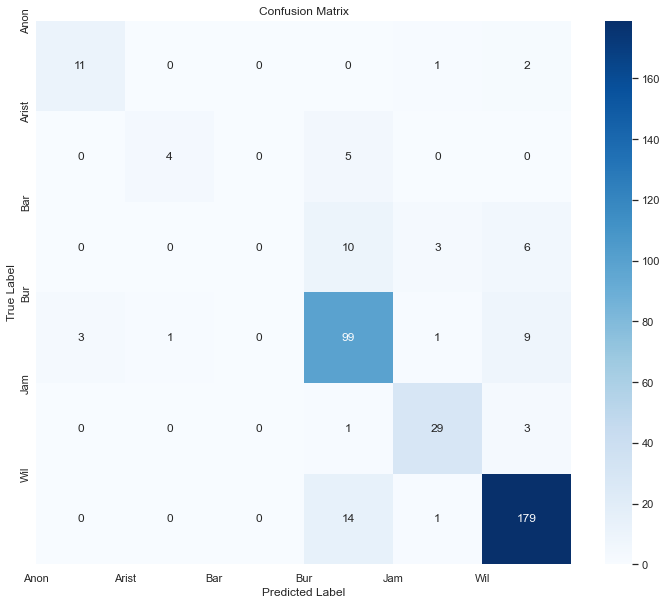

In [691]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels of the test data
y_pred = rf.predict(X_test)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Map the integer-encoded labels back to the original translator names
y_test_labels = class_names
y_pred_labels = class_names

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label', ha='center')
plt.ylabel('True Label', ha='center')
plt.xticks(np.arange(len(class_names)), class_names, ha='center')
plt.yticks(np.arange(len(class_names)), class_names, ha='center')
plt.title('Confusion Matrix')
plt.show()

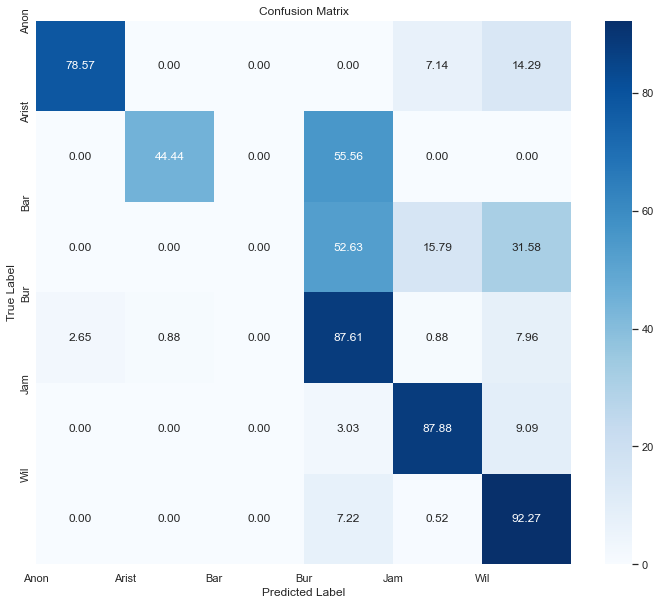

In [692]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels of the test data
y_pred = rf.predict(X_test)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentage
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Map the integer-encoded labels back to the original translator names
y_test_labels = class_names
y_pred_labels = class_names

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted Label', ha='center')
plt.ylabel('True Label', ha='center')
plt.xticks(np.arange(len(class_names)), class_names, ha='center')
plt.yticks(np.arange(len(class_names)), class_names, ha='center')
plt.title('Confusion Matrix')
plt.show()

#### Randomly select 5 rows for each author (i.e. tf-idf values for 5 random samples for each author). This way, we can mitigate the skewed distribution of the number of samples for each author.

In [693]:
# Find the number of rows for the translator with the fewest samples
min_rows = tfidf_df['Translator'].value_counts().min()
print(min_rows)

# Group the dataframe by the translator's name
grouped = tfidf_df.groupby(tfidf_df.columns[0])

# Create an empty list to store the selected rows
selected_rows = []

# Loop through each group (each group corresponds to a translator)
for name, group in grouped:
    # Select random rows from the group, equal to min_rows
    selected = group.sample(min_rows)
    # Append the selected rows to the list
    selected_rows.append(selected)

# Concatenate all selected rows into a single dataframe
selected_df = pd.concat(selected_rows)
selected_df

35


,Translator,ab,ad,ait,aut,autem,circa,cum,de,enim,...,secundum,sed,si,sic,sicut,sunt,unum,ut,utique,vero
146,Anon,0.035577,0.080048,0.008894,0.115625,0.071154,0.008894,0.017788,0.080048,0.106731,...,0.088942,0.097837,0.062260,0.053365,0.008894,0.080048,0.142308,0.142308,0.000000,0.168991
121,Anon,0.016539,0.107504,0.000000,0.165391,0.124043,0.024809,0.008270,0.215008,0.099235,...,0.066156,0.099235,0.066156,0.016539,0.008270,0.090965,0.206739,0.057887,0.000000,0.115774
131,Anon,0.000000,0.413532,0.000000,0.120613,0.051691,0.000000,0.000000,0.000000,0.111998,...,0.327379,0.094768,0.000000,0.060307,0.017230,0.111998,0.060307,0.198151,0.000000,0.189535
123,Anon,0.008227,0.024682,0.000000,0.115184,0.074047,0.049365,0.000000,0.115184,0.115184,...,0.024682,0.164549,0.246824,0.032910,0.000000,0.041137,0.041137,0.065820,0.000000,0.090502
151,Anon,0.009287,0.037147,0.009287,0.213596,0.139302,0.000000,0.009287,0.055721,0.074294,...,0.111441,0.120728,0.139302,0.018574,0.065007,0.055721,0.343610,0.139302,0.000000,0.148588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
675,Wil,0.064389,0.257556,0.128778,0.103022,0.283311,0.000000,0.025756,0.000000,0.206045,...,0.128778,0.103022,0.115900,0.077267,0.012878,0.077267,0.038633,0.077267,0.115900,0.012878
618,Wil,0.075387,0.172312,0.000000,0.021539,0.258468,0.010770,0.000000,0.000000,0.226160,...,0.118465,0.064617,0.118465,0.043078,0.043078,0.043078,0.021539,0.000000,0.053848,0.000000
329,Wil,0.017441,0.078484,0.008720,0.043602,0.218010,0.000000,0.008720,0.000000,0.130806,...,0.095925,0.095925,0.148247,0.034882,0.000000,0.034882,0.000000,0.026161,0.061043,0.000000
356,Wil,0.097168,0.118761,0.000000,0.064779,0.161947,0.000000,0.010796,0.032389,0.151151,...,0.129558,0.129558,0.075575,0.032389,0.043186,0.086372,0.010796,0.075575,0.118761,0.000000


In [694]:
sampled_tfidf_df_nolabels = selected_df.iloc[:, 1:]

In [695]:
#sample_names = tfidf_df['Sample Name'].tolist()
translators = selected_df['Translator'].tolist()

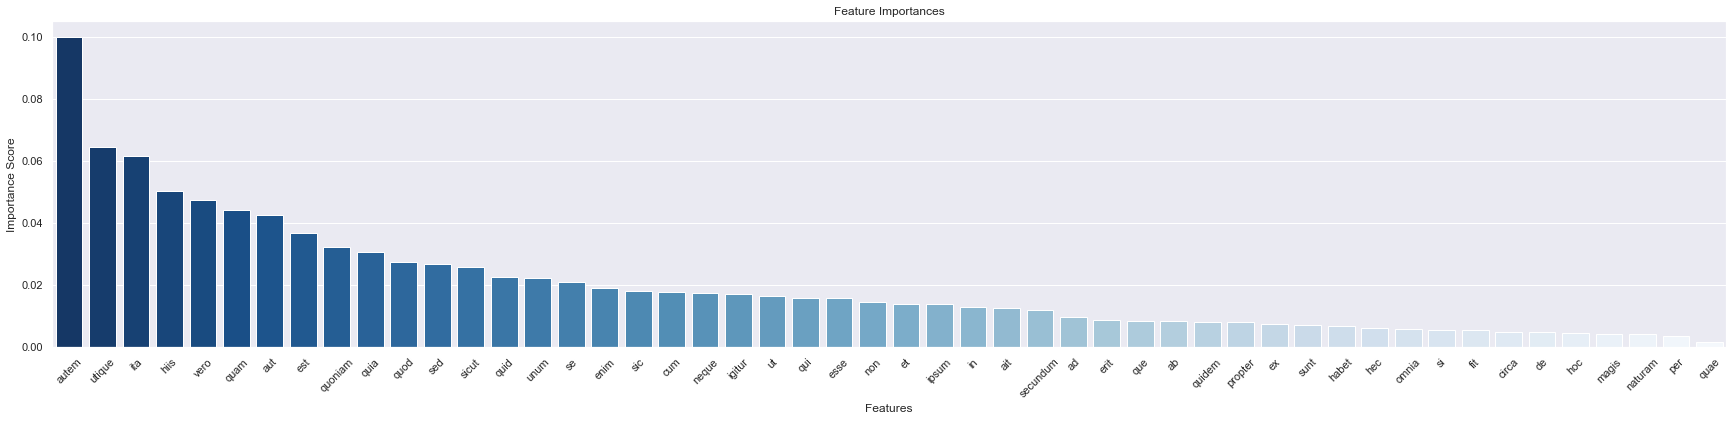

In [696]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Train the classifier
clf = RandomForestClassifier(n_estimators=100)
X = sampled_tfidf_df_nolabels.values
y = translators
clf.fit(X, y)

# Plot the feature importances
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
features = sampled_tfidf_df_nolabels.columns[:]
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(30,6))
sns.barplot(x=features[indices], y=importances[indices], palette='Blues_r')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importances')
plt.show()

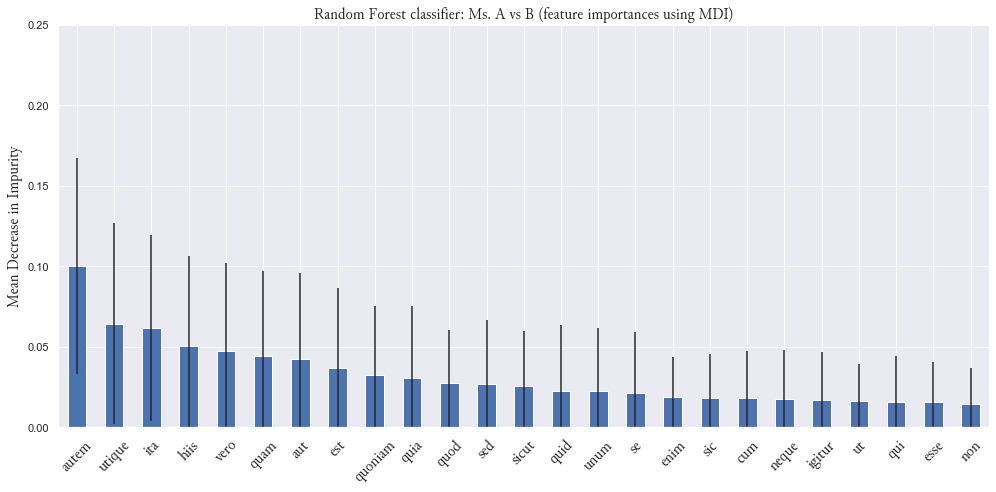

In [697]:
topn = 25 # default: 20
idxs = np.argsort(importances)[::-1][:topn]

importances = importances[idxs]
std = std[idxs]
names = sampled_tfidf_df_nolabels.columns[:]
names = names[idxs]
forest_importances = pd.Series(importances, index=names)

forest_importances = pd.Series(importances, index=names)
sns.set_theme()

# set junicode font for labels (able to render medieval glyphs)
font = {'family': 'Junicode',
        'size': 15,
        }

fig, ax = plt.subplots(figsize=(14, 7))
forest_importances.plot.bar(yerr=std, ax=ax, rot=0)
ax.set_title("Random Forest classifier: Ms. A vs B (feature importances using MDI)", fontdict=font)
ax.set_ylabel("Mean Decrease in Impurity", fontdict=font)
ax.set_xticklabels(names, fontdict=font, rotation=45)
#ax.set_yticklabels(importances, fontdict=font)
ax.set_ylim((0, .25))
fig.tight_layout()
plt.savefig('features_importance_mdi.svg', transparent=False, dpi=300)

In [698]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from dtreeviz.trees import dtreeviz

# put data in one variable
data = np.vstack(sampled_tfidf_df_nolabels.values), np.array(translators)

X = data[0] # features
y = data[1] # labels

X_inst = data[0][np.random.randint(0, len(data[0])),:]

lb = LabelEncoder()
y2 = lb.fit_transform(y)
y_series = pd.Series(y2)
class_names = list(lb.inverse_transform(np.unique(y2)))
print(class_names)

rf = RandomForestClassifier(n_estimators=100,
                            max_depth=3,
                            max_features=0.9,
                            min_samples_leaf=5,
                            n_jobs=-1,
                            random_state=0)

rf.fit(X, y)

tree_n=11

viz = dtreeviz(rf.estimators_[tree_n], X, y_series, # change the estimator number to get a different decision tree
               target_name="Translator",
               class_names=class_names,
               feature_names=features,
               title=f"{tree_n+1}th decision tree for scribal features",
               fontname='Junicode',
               fancy=True, 
               X=X_inst,
               orientation='LR')

viz.save(f"decision_tree_{tree_n+1}.svg")

['Anon', 'Arist', 'Bar', 'Bur', 'Jam', 'Wil']


In [699]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross validation
scores = cross_val_score(rf, X, y, cv=5)

# Print the mean and standard deviation of the scores
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.08)


In [700]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = rf.score(X_test, y_test)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.9


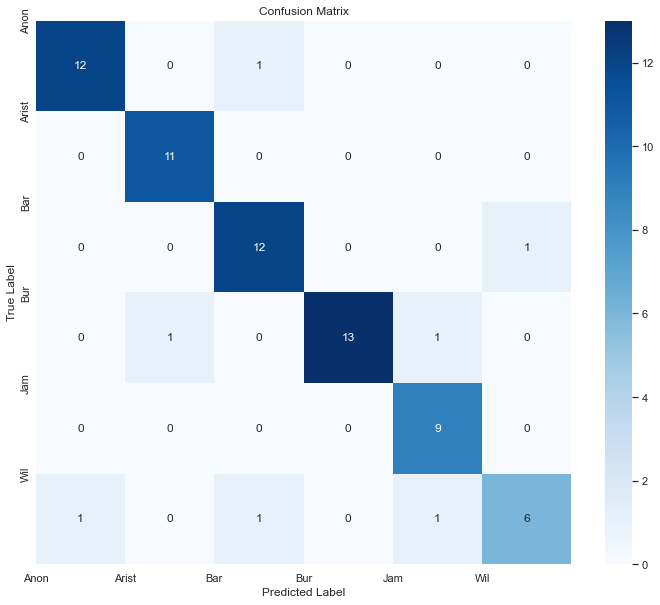

In [701]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels of the test data
y_pred = rf.predict(X_test)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Map the integer-encoded labels back to the original translator names
y_test_labels = class_names
y_pred_labels = class_names

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Label', ha='center')
plt.ylabel('True Label', ha='center')
plt.xticks(np.arange(len(class_names)), class_names, ha='center')
plt.yticks(np.arange(len(class_names)), class_names, ha='center')
plt.title('Confusion Matrix')
plt.show()

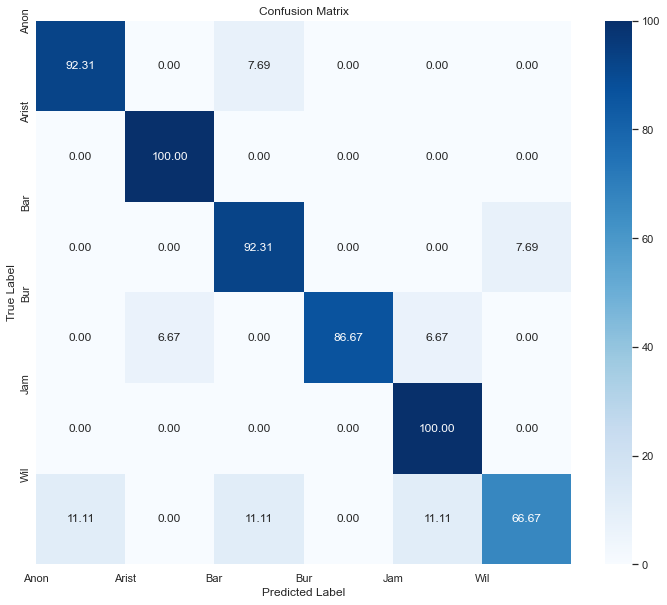

In [702]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict the labels of the test data
y_pred = rf.predict(X_test)

# Create the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the percentage
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Map the integer-encoded labels back to the original translator names
y_test_labels = class_names
y_pred_labels = class_names

# Plot the confusion matrix using seaborn
plt.figure(figsize=(12,10))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f')
plt.xlabel('Predicted Label', ha='center')
plt.ylabel('True Label', ha='center')
plt.xticks(np.arange(len(class_names)), class_names, ha='center')
plt.yticks(np.arange(len(class_names)), class_names, ha='center')
plt.title('Confusion Matrix')
plt.show()

## RandomUnderSampler

**Caution!** We have a very skewed distribution where some translators have a lot more samples than others, so we'll be randomly undersampling the majority class to balance the distribution. We're using the RandomUnderSampler for this purpose.